In [1]:
#Probability distribution of Normal Distribution

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [5]:
# help(stats.norm.cdf)
#P(X<=70)
stats.norm.cdf(70,loc=60,scale=10)

0.8413447460685429

In [8]:
#P(X>70) = 1 - P(X<=70) 
1 - stats.norm.cdf(70,loc=60,scale=10)

0.15865525393145707

In [6]:
#P(x>70)
stats.norm.sf(70,loc=60,scale=10)

0.15865525393145707

In [7]:
stats.norm.cdf(70,loc=60,scale=10) + stats.norm.sf(70,loc=60,scale=10)

1.0

In [9]:
#Exercise
#Suppose GMAT score can be model using normal distribution :- mean=711 and sd=29 , FIND P(X<=680)
stats.norm.cdf(680,loc=711,scale=29)

0.14254260383881612

In [10]:
#OR we can do this
1 - stats.norm.sf(680,711,29)

0.14254260383881612

In [11]:
#P(X>720)
stats.norm.sf(720,loc=711,scale=29)

0.37814937265194704

In [12]:
#P(680 <= X <= 740)
stats.norm.cdf(740,711,29) - stats.norm.cdf(680,711,29)

0.6988021422297268

In [14]:
beml = pd.read_csv("datasets/BEML.csv")
glaxo = pd.read_csv("datasets/GLAXO.csv")

In [23]:
glaxo.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58


In [52]:
beml["Gain"] = beml.Close.pct_change()
glaxo["Gain"] = glaxo.Close.pct_change()

In [53]:
beml.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Gain
0,2010-01-04,1121.0,1151.0,1121.00,1134.0,1135.6,101651.0,1157.18,NaN
1,2010-01-05,1146.8,1149.0,1128.75,1135.0,1134.6,59504.0,676.47,-0.000881


<Axes: title={'center': 'GLAXO'}, ylabel='Frequency'>

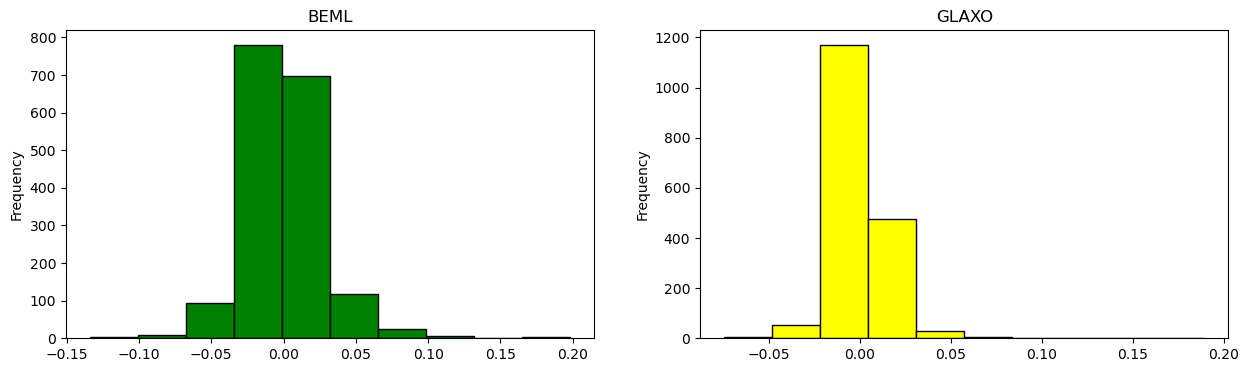

In [59]:
fig,axesbi = plt.subplots(1,2,figsize=(15,4))
beml.Gain.plot(kind="hist",ax=axesbi[0],color="green",edgecolor="black",title="BEML")
glaxo.Gain.plot(kind="hist",ax=axesbi[1],color="yellow",edgecolor="black",title="GLAXO")

In [55]:
beml.Gain.describe()

count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: Gain, dtype: float64

In [56]:
glaxo.Gain.describe()

count    1738.000000
mean        0.000386
std         0.013361
min        -0.074719
25%        -0.005850
50%        -0.000021
75%         0.005826
max         0.189196
Name: Gain, dtype: float64

In [ ]:
#Gain more than 2%

In [63]:
#For BEML
stats.norm.sf(0.02,loc=beml.Gain.mean(),scale=beml.Gain.std())

0.22769829484075343

In [64]:
#For Glaxo
stats.norm.sf(0.02,loc=glaxo.Gain.mean(),scale=glaxo.Gain.std())

0.07104511457618568

In [ ]:
#Loss more the 2%

In [65]:
#For BEML
stats.norm.cdf(-0.02,loc=beml.Gain.mean(),scale=beml.Gain.std())

0.22155987503755292

In [66]:
#For Glaxo
stats.norm.cdf(-0.02,loc=glaxo.Gain.mean(),scale=glaxo.Gain.std())

0.06352488667177397

In [70]:
#Using time column as index
beml_df = beml[["Date","Close"]]
glaxo_df = glaxo[["Date","Close"]]

In [72]:
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df["Date"]))
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df["Date"]))

Text(0, 0.5, 'Close')

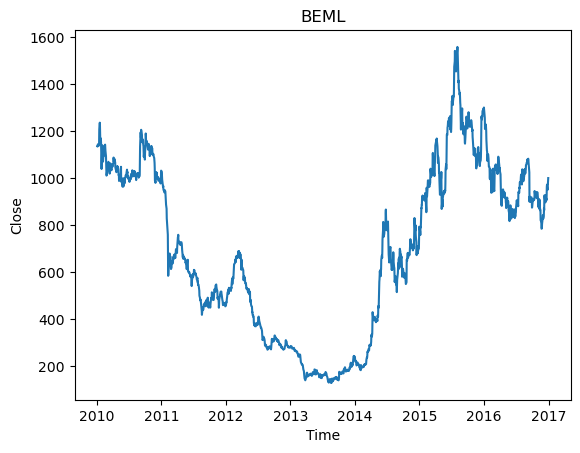

In [81]:
plt.plot(beml_df.Close)
plt.title("BEML")
plt.xlabel("Time")
plt.ylabel("Close")

Text(0, 0.5, 'Close')

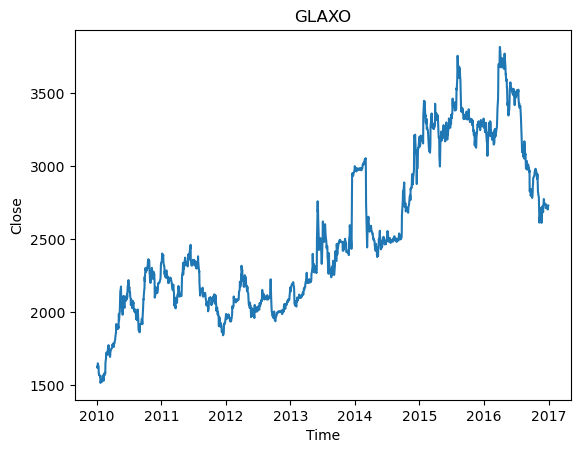

In [80]:
plt.plot(glaxo_df.Close)
plt.title("GLAXO")
plt.xlabel("Time")
plt.ylabel("Close")

In [83]:
beml_df["Gain"] = beml_df.Close.pct_change(periods=1).dropna()
glaxo_df["Gain"] = glaxo_df.Close.pct_change(periods=1).dropna()

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_legend'

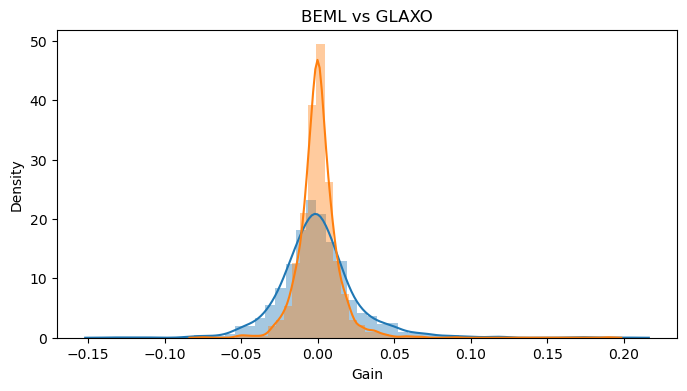

In [97]:
plt.figure(figsize=(8,4))
sns.distplot(beml_df.Gain)
sns.distplot(glaxo_df.Gain)
plt.title("BEML vs GLAXO")
plt.xlabel("Gain")
plt.ylabel("Density")

In [98]:
# plt.figure(figsize=(8,4))
# sns.distplot(glaxo_df.Gain,label="GLAXO")
# plt.xlabel("Gain")
# plt.ylabel("Density")

In [99]:
#Inferential Statistics